In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('acc_00001.csv')  #read the first two data file

In [3]:
data1 = pd.read_csv('acc_00002.csv') #read the first two data file

In [4]:
def transform_new(data):   #transform the initial data to suitable form, split the whole data into several features
    data = data.iloc[:,0].str.split(';', expand = True)
    data.columns = ['hour', 'minute', 'second', 'microsecond', 'hori_acc', 'ver_acc']
    data[['hour', 'minute','second',  'microsecond', 'hori_acc', 'ver_acc']] = data[['hour', 'minute','second', 'microsecond', 'hori_acc', 'ver_acc']].astype(float)
    data['datatime'] = data['second'] + data['microsecond']/1e6
    data.drop('hour', axis = 1, inplace = True)
    data.drop('minute', axis = 1, inplace = True)
    data.drop('second', axis = 1, inplace = True)
    data.drop('microsecond', axis = 1, inplace = True)
    
    data.insert(0, 'datatime', data.pop('datatime'))
    
    return data

In [5]:
data = transform_new(data)
data1 = transform_new(data1)

In [6]:
data #check the new transformed data, because hour,minute are the same in the same file, so only second and 
     #microsecond should be considered, microsecond is transformed to second.

,datatime,hori_acc,ver_acc
0,0.42508,0.438,0.179
1,0.42512,-0.079,0.646
2,0.42516,-0.523,-0.411
3,0.42520,-0.146,-0.387
4,0.42523,0.292,0.208
...,...,...,...
2554,0.52484,-0.102,0.438
2555,0.52488,-0.556,0.386
2556,0.52492,-0.762,0.371
2557,0.52496,0.015,0.136


In [8]:
def plot_hori_ver(data):  #use datatime as x axis, hori_acc or ver_acc as y axis
    ax = plt.subplot(1,2,1)
    ax.plot(data['datatime'], data['hori_acc'], 'r', label = 'hori_acc')
    plt.xlabel('datatime, s')
    plt.ylabel('acc')
    plt.legend()
    bx = plt.subplot(1,2,2)
    bx.plot(data['datatime'], data['ver_acc'], 'g', label = 'ver_acc')
    plt.xlabel('datatime, s')
    plt.ylabel('acc')
    plt.legend()

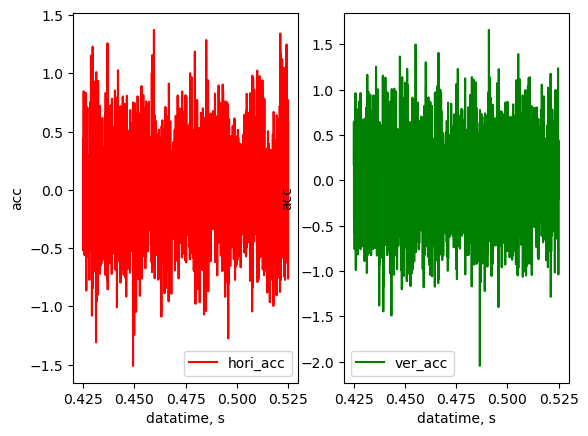

In [9]:
plot_hori_ver(data)

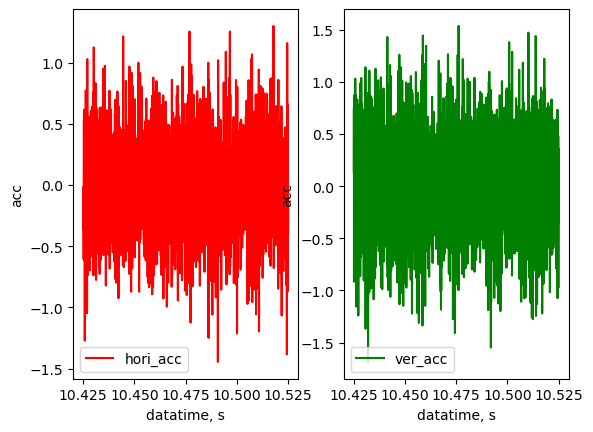

In [10]:
plot_hori_ver(data1)